
# Minimum number of Dark Exposures calculator

This notebook takes the read noise and known dark current and exposure time and calculate the minimum number of dark exposures
necessary to be able to see the dark current.

## Required Variables
The following variables must be set

In [14]:
READ_NOISE = 15 # electrons
DARK_CURRENT = 0.05 # electrons per second per pixel
EXPOSURE_TIME = 60 # seconds
TIME_BETWEEN_EXPOSURES = 8 # seconds

### Calculate the minimum number of dark exposures

The minimum number of images to have more dark current than read noise with an exposure time of 60 seconds is: 
25 exposures
Which would take a minimum of 0.4722222222222222 hours to gather


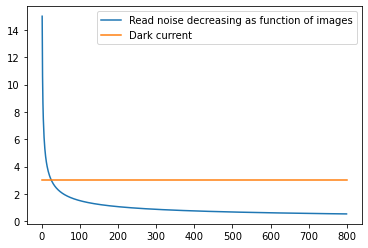

In [15]:
import matplotlib.pyplot as plt
import numpy as np

dark_current_per_pixel = DARK_CURRENT * EXPOSURE_TIME
minimum_number_of_images = (READ_NOISE/dark_current_per_pixel)**2
total_exposure_time = minimum_number_of_images * (EXPOSURE_TIME + TIME_BETWEEN_EXPOSURES)
print(f"The minimum number of images to have more dark current than read noise with an exposure time of {EXPOSURE_TIME} seconds is: ")
print(f"{round(minimum_number_of_images)} exposures")
print(f"Which would take a minimum of {total_exposure_time/3600} hours to gather")

number_of_images = np.arange(1, 800)

modified_read_noise = READ_NOISE/np.sqrt(number_of_images)
dark_current_array = np.full(modified_read_noise.shape, dark_current_per_pixel)

plt.plot(number_of_images, modified_read_noise, label="Read noise decreasing as function of images")
plt.plot(number_of_images, dark_current_array, label="Dark current")
plt.legend()
plt.show()